In [1]:
#import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Loading datasets
wine = pd.read_csv('winequality-red.csv',sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#preprocessing data
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] =  pd.cut(wine['quality'],bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [6]:
label_quality = LabelEncoder()

In [7]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [8]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

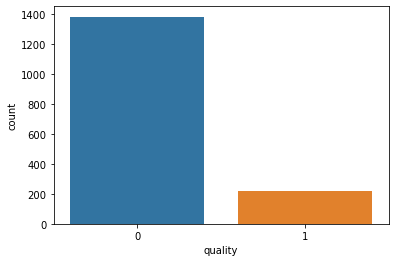

In [10]:
sns.countplot(wine['quality'])

In [11]:
#now separate the datasets as response variable and features variable
X = wine.drop(['quality'],axis = 1)
y = wine['quality']

In [12]:
#Train and test splitting of data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
#Applied standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
X_train[:10]

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01,
        -4.54281813e-01, -5.03192118e-01,  3.61097191e+00,
         9.09502082e-01, -4.01203069e-01,  1.01180685e+00,
         1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00,
        -3.84209259e-01, -3.54641111e-01, -9.66099468e-01,
        -9.68038212e-01,  1.09923481e+00, -2.10687612e+00,
         1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03,
         3.62260706e-02, -7.87606704e-02, -3.81792484e-01,
         9.39784989e-01, -2.05493781e-01,  4.92026353e-01,
         2.97270776e-01,  5.50057013e-01],
       [-1.11466094e+00,  7.52267272e-01, -9.73624306e-01,
        -3.14136704e-01, -9.06401994e-01,  2.99898997e-01,
         3.12977507e-02, -1.02094915e+00,  1.14175197e+00,
        -9.80573115e-01,  9.27672840e-01],
       [-4.72562403e-01,  2.57599537e-01, -6.66568381e-01,
        -2.44064149e-01, -2.27311677e-01,  1.07897498e+00,
  

# Random forest classifier

In [16]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
X_test[:20]

array([[-0.35676932,  0.26010529, -0.99737889, -0.01218939,  0.57817253,
        -0.16253158,  0.02135586,  0.21416221, -0.41107917,  0.02096782,
        -0.77477782],
       [-0.30129498, -0.0901066 , -0.53147526, -0.67041646, -0.10443547,
         0.48070295,  1.74263175, -0.33840642,  0.55616594, -1.08367852,
        -0.86743843],
       [ 1.30746073,  0.90216042, -0.2726399 ,  0.13408329,  0.42885203,
         0.11314036, -0.34748897,  1.8718681 , -0.15314714,  1.98478355,
        -0.49679599],
       [ 0.08702536, -0.3235812 ,  0.19326373, -0.19503024, -0.18976147,
         1.49150006,  0.39020069,  0.66626381,  0.16926789, -0.71546307,
        -0.5894566 ],
       [-0.91151266, -0.3235812 , -0.16910576, -0.59728012, -0.21109297,
         0.20503101, -0.34748897, -0.94120857,  0.55616594, -0.34724762,
         0.15182827],
       [-0.63414099, -0.61542444,  0.14149666, -0.30473476, -0.08310397,
         1.767172  ,  0.82051967,  0.16392869,  0.87858097, -0.83820156,
        -0.960

In [22]:
#Lets see how our model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       413
           1       0.62      0.36      0.45        67

    accuracy                           0.88       480
   macro avg       0.76      0.66      0.69       480
weighted avg       0.86      0.88      0.87       480

[[398  15]
 [ 43  24]]


# SVM Classifier

In [24]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [25]:
#Let's see how our model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       413
           1       0.68      0.28      0.40        67

    accuracy                           0.88       480
   macro avg       0.79      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480

[[404   9]
 [ 48  19]]


# Neural Network

In [26]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11),max_iter = 500)
mlpc.fit(X_train,y_train)
pred_mlpc = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#Let's see how our model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       413
           1       0.68      0.28      0.40        67

    accuracy                           0.88       480
   macro avg       0.79      0.63      0.67       480
weighted avg       0.86      0.88      0.86       480

[[404   9]
 [ 48  19]]


In [29]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_rfc)
cm


0.8791666666666667

In [30]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_mlpc)
cm

0.88125

In [31]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_clf)
cm

0.88125

In [32]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [35]:
Xnew = [[7.3, 0.58, 0.56, 2.3, 1.5, 20, 40, 0.9965, 3.30, 0.56, 9.6]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])